## 1. 회귀분석

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from scipy import stats
from scipy.stats import shapiro

### 1-1 단순선형회귀: tips
- 선형성:  독립변수 vs 종속변수
- 독립성: Durbin - Wartson 검정으로 잔차의 자기 상관을 확인
- 등분산성: 예측값과 잔차의 산점도를 통해 잔차분석
- 정규성: QQ-plot과 sharpiro-wilk를 통해 잔차의 정규성 확인

'tip'과 'total_bill' 간의 상관계수를 계산하여 선형 관계가 존재하는지 확인해야 한다.  
선형성이 충분하다면 회귀 모델을 적용할 수 있다.

In [ ]:
# Seaborn의 tips 데이터셋 로드
tips = sns.load_dataset('tips')

display(tips.head(3))
display(tips[['tip','total_bill']].corr().round(2))

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


,tip,total_bill
tip,1.00,0.68
total_bill,0.68,1.00


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


<br>

선형회귀식은 일반적으로 y = b0 + b1x 형태로 작성되기 때문에, 절편(intercept, b0) 을 학습할 수 있도록 x에 상수항(1) 을 추가해 준다.  
상수항 없이 모델을 만들면 무조건 원점을 지나야 해서, 현실을 잘 반영하지 못한다.

In [ ]:
# 회귀모형 생성
#   X: (상수항 + total_bill) 2개의 컬럼을 가진 DataFrame
X = sm.add_constant(tips['total_bill'])  # 상수항 추가
y = tips['tip']

# OLS (Ordinary Least Squares, 최소제곱법) 모델 생성
#   y ~ X 의 관계 학습
#   .fit(): 모델 학습(회귀계수 추정)
model = sm.OLS(y,X).fit()

기본 정보
- Dep. Variable(종속 변수):	tip  
- Model(회귀 모델 종류): OLS
- No. Observations(관측치 수): 244개
- Df Model(모델 자유도, 독립변수 수): 1개
- Df Residuals(잔차 자유도): 242개 (244 - 2)

모델 설명력
- R-squared = 0.457  
    → 총 청구 금액(total_bill)이 팁(tip)의 약 45.7% 정도를 설명할 수 있다.  
    → 완벽한 설명은 아니지만, 어느 정도 상관관계가 있다는 것을 보여준다.

회귀계수(coef)
- 회귀식
```
tip = 0.9203 + 0.1050 * total_bill
```
- total_bill이 1 단위 증가할 때, tip은 평균 0.105 단위 증가한다.
- 절편 0.9203은 total_bill=0일 때의 팁 예측값인데, 해석 실질성은 적지만 모델 계산에는 필요하다.
- p값이 0.000 → 통계적으로 유의미하다.

추가 통계
- F-statistic(모델 전체의 유의성 검정 통계량):	203.4
- Prob (F-statistic)(모델 전체 p값):	6.69e-34 → 매우 작음  
    → 전체 모델이 통계적으로 유의미하다.
- Durbin-Watson(잔차의 자기상관 검정):	2.151
    → 약 2에 가까우므로, 잔차 간의 자기상관은 특별히 문제되지 않는다.

<br>

총 청구 금액(total_bill)은 팁(tip)에 대해 약 45.7% 정도 설명할 수 있다.  

두 변수는 통계적으로 유의미한 양의 관계가 있다.  

단순 선형 회귀 모델 `tip = 0.9203 + 0.1050 * total_bill` 로 표현할 수 있다.  

회귀모형은 기본적인 선형 가정을 만족하는 것으로 보인다.  

=> 총 금액이 높아질수록 팁도 증가하는 경향이 있으며, 이 관계는 통계적으로 유의미하다.

<br>

In [ ]:
# 잔차 및 예측값
# 잔차 = 실제값 − 예측값
residuals = model.resid  # model.resid: 잔차(residuals)를 가져옴
fitted_values = model.fittedvalues  # model.fittedvalues: 모델이 예측한 값(predicted values)을 가져옴

print(residuals[:5])
print(fitted_values[:5])

0   -1.694636
1   -0.346223
2    0.373165
3   -0.097250
4    0.107178
dtype: float64
0    2.704636
1    2.006223
2    3.126835
3    3.407250
4    3.502822
dtype: float64


잔차가 음수이면 예측값이 실제값보다 크고, 잔차가 양수이면 예측값이 실제값보다 작다.

residuals
- 0번 데이터: 실제 팁보다 예측값이 약 1.6946만큼 과대 추정되었다는 의미

- 2번 데이터: 잔차가 양수 → 실제 팁이 예측값보다 약 0.3731만큼 더 많았다는 뜻

fitted_values
- 0번 데이터: total_bill을 기반으로 예측한 팁은 약 2.70달러이다.  
    → 즉, 각각의 청구 금액에 대해 모델이 예측한 팁 금액이 얼마인지를 나타낸다.


<br>





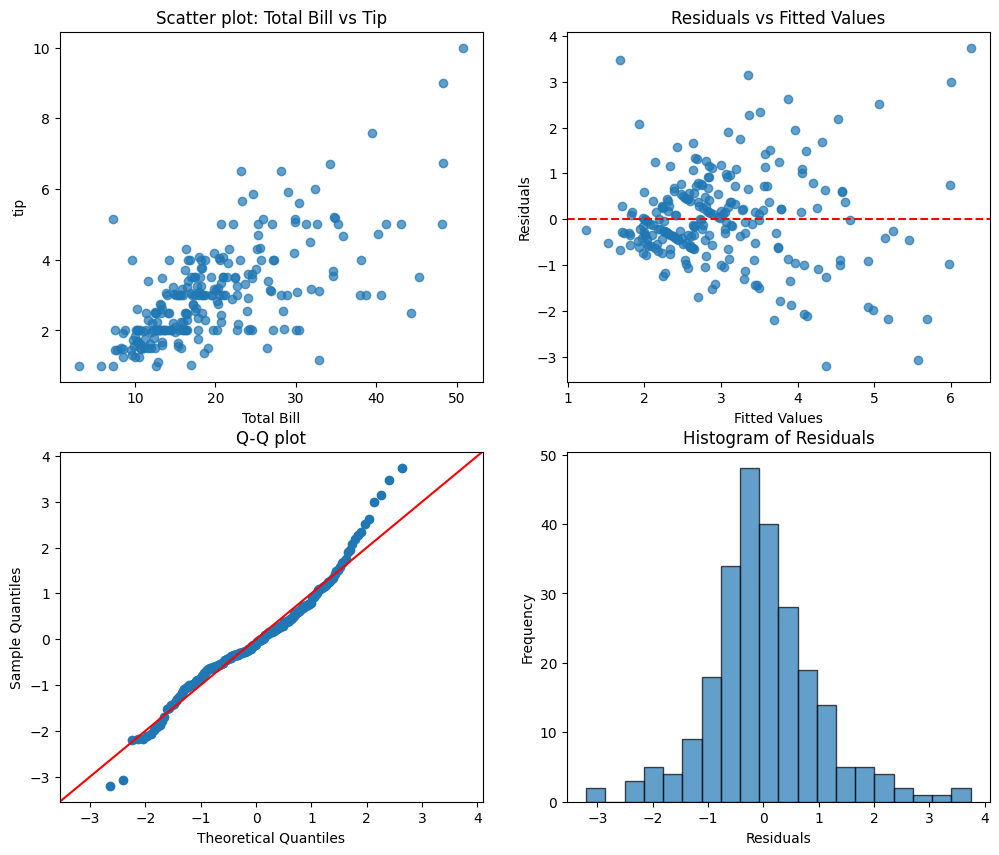

In [ ]:
# 2x2 subplot 생성
fig, ax = plt.subplots(2, 2, figsize = (12, 10))

# 1. 산점도 확인 Total Bill vs Tip (선형성)
ax[0, 0].scatter(tips['total_bill'], tips['tip'] , alpha=0.7)
ax[0, 0].set_title('Scatter plot: Total Bill vs Tip')
ax[0, 0].set_xlabel('Total Bill')
ax[0, 0].set_ylabel('tip')
# -> total_bill과 tip (팁 금액) 간 선형 관계 확인

# 2. 잔차 vs 예측값 (등분산성)
ax[0, 1].scatter(fitted_values, residuals, alpha=0.7)
ax[0, 1].set_title('Residuals vs Fitted Values')  # 에러 vs 예측
ax[0, 1].set_xlabel('Fitted Values')
ax[0, 1].set_ylabel('Residuals')
ax[0, 1].axhline(y=0, linestyle='--', color='red')
# -> 이상적으로는 모든 점들이 y=0 선을 중심으로 고르게 퍼져 있어야 한다.
# -> 특정 패턴(곡선 모양 등)이 보이면 선형성 가정이 깨졌음을 의미할 수 있다.

# 3. Q-Q plot (정규성 검토)
# 잔차 데이터의 quantile vs 이론적인 quantile
sm.qqplot(residuals, line='45', ax = ax[1, 0])
ax[1, 0].set_title('Q-Q plot')
# -> 잔차가 정규 분포를 따르는지 확인 (크게 벗어난다면 정규성 가정을 만족하지 않는 것)

# 4. 잔차 히스토그램 (정규성 확인)
ax[1, 1].hist(residuals, bins=20, alpha=0.7, edgecolor='black')
ax[1, 1].set_title('Histogram of Residuals')
ax[1, 1].set_xlabel('Residuals')
ax[1, 1].set_ylabel('Frequency')

plt.show()

결과 해석  

(1) Scatter plot: Total Bill vs Tip  
- 우상향하는 패턴
- 총 지불 금액(total_bill)이 클수록 팁 금액(tip)도 커지는 경향이 있다.
- 완벽한 직선은 아니지만, 어느 정도 선형 관계가 존재한다.

(2) Residuals vs Fitted Values
- 잔차들이 대체로 y=0을 중심으로 퍼져 있어 등분산성을 대체로 만족한다.
- 예측값이 커질수록 잔차의 분산이 약간 커지는 경향

(3) Q-Q Plot
- 대다수 점들이 빨간 45도 선을 잘 따라간다.
- 양 끝 부분(꼬리)은 약간 벗어났지만, 대체로 잔차가 정규 분포를 따른다고 볼 수 있다.

(4) Histogram of Residuals
- 잔차의 분포는 대칭적이며, 종 모양을 보인다.
- 정규성 가정을 크게 위반하지 않는다고 해석할 수 있다.

=> 전체적으로 모델은 "총 지불 금액"을 기반으로 "팁"을 예측하는 데 적절하며, 선형회귀의 주요 가정을 대체로 만족한다고 볼 수 있다.


<br>


### 정량화
- 1. 선형성 -> 상관관계 `.corr()`
- 2. 오차의 자기상관이있는지(독립성): 더빈왓슨 통계(2에 가까우면 좋다)
- 3. 잔차의 정규성확인: shapiro wilk (t-test 하는 것과 동일)
- 4. 등분산성확인(Breusch-Pagan)

In [ ]:
# 1. 선형관계: 상관관계
print('1. 선형성: 상관관계')
display(tips[['total_bill','tip']].corr().round(2))

# 2. 더빈-왓슨 통계: 오차의 자기 상관 측정
dw_stat = durbin_watson(residuals)
print(f'2. 오차의 자기 상관 (더빈-왓슨): {dw_stat:.3f}')

# 3. 샤피로-윌크: 잔차의 정규성 확인
# 귀무가설(H₀): 데이터는 정규분포를 따른다.
shapiro_stat, shapiro_p_value = shapiro(residuals)
print(f'3. 정규성 (샤피로-윌크) \n\t통계량: {shapiro_stat:.3f}, p-value:{shapiro_p_value:.3f}')

# 4. 등분산성 확인
# 잔차와 설명변수(X)를 이용하여 Breusch-Pagan Test
# 귀무가설: 등분산성 만족
# 대립가설: 등분산성 만족 X
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, X)
print(f'4. 등분산성 검정 (Breusch-Pagan): \n\tStatistic: {bp_test[0]:.3f}, p-value: {bp_test[1]:.3f}')

1. 선형성: 상관관계


,total_bill,tip
total_bill,1.00,0.68
tip,0.68,1.00


2. 오차의 자기 상관 (더빈-왓슨): 2.151
3. 정규성 (샤피로-윌크) 
	통계량: 0.967, p-value:0.000
4. 등분산성 검정 (Breusch-Pagan): 
	Statistic: 47.876, p-value: 0.000


결과 해석  

(1) 선형성 확인
- 0.68이라는 수치는 적당히 강한 선형 관계를 의미  
    → 회귀모델 선형성 가정 만족

(2) 오차 독립성 확인 (Durbin-Watson)  
- 2에 매우 가까운 값이므로 잔차 간의 자기 상관은 없다고 볼 수 있다.  
    → 회귀모델 독립성 가정 만족

(3) 잔차 정규성 확인 (Shapiro-Wilk Test)
less
- p-value가 0.000 → 귀무가설(정규성 만족) 기각
    → 잔차가 정규분포를 따르지 않는다고 판단

    다만, 데이터 수가 많을수록 정규성 검정은 민감해지는 경향이 있기 때문에 히스토그램이나 Q-Q plot을 추가로 참고하는 것이 좋다.

(4) 등분산성 확인 (Breusch-Pagan Test)
- p-value가 0.000 → 귀무가설(등분산성 만족) 기각  
    →  회귀모델의 등분산성 가정 위반

등분산성 확보를 위해 할수 있는것들  
- 로그 변환  
- 제곱근 변환  
- Z-scoere 표준화: sklearn.preprocessing - standard scaler / min-maxscaler
- Box cox 변화(`from scipy.stats import boxcox`

In [ ]:
# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           6.69e-34
Time:                        09:53:05   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

기본 정보
- Dep. Variable(종속 변수):	tip  
- Model(회귀 모델 종류): OLS
- No. Observations(관측치 수): 244개
- Df Model(모델 자유도, 독립변수 수): 1개
- Df Residuals(잔차 자유도): 242개 (244 - 2)

모델 설명력
- R-squared = 0.457  
    → 총 청구 금액(total_bill)이 팁(tip)의 약 45.7% 정도를 설명할 수 있다.  
    → 완벽한 설명은 아니지만, 어느 정도 상관관계가 있다는 것을 보여준다.

회귀계수(coef)
- 회귀식
```
tip = 0.9203 + 0.1050 * total_bill
```
- total_bill이 1 단위 증가할 때, tip은 평균 0.105 단위 증가한다.
- 절편 0.9203은 total_bill=0일 때의 팁 예측값인데, 해석 실질성은 적지만 모델 계산에는 필요하다.
- p값이 0.000 → 통계적으로 유의미하다.

추가 통계
- F-statistic(모델 전체의 유의성 검정 통계량):	203.4
- Prob (F-statistic)(모델 전체 p값):	6.69e-34 → 매우 작음  
    → 전체 모델이 통계적으로 유의미하다.
- Durbin-Watson(잔차의 자기상관 검정):	2.151
    → 약 2에 가까우므로, 잔차 간의 자기상관은 특별히 문제되지 않는다.

<br>

총 청구 금액(total_bill)은 팁(tip)에 대해 약 45.7% 정도 설명할 수 있다.  

두 변수는 통계적으로 유의미한 양의 관계가 있다.  

단순 선형 회귀 모델 `tip = 0.9203 + 0.1050 * total_bill` 로 표현할 수 있다.  

회귀모형은 기본적인 선형 가정을 만족하는 것으로 보인다.  

=> 총 금액이 높아질수록 팁도 증가하는 경향이 있으며, 이 관계는 통계적으로 유의미하다.

<br>

### Q1) 1-2 단순선형회귀: 폐활량과 먼지노출
- 단순선형회귀: 먼지노출정도(Exposure)에 따른 폐활량(PEFR)

먼지 노출 정도(Exposure)가 폐활량(PEFR)에 어떤 영향을 미치는지를 수치적으로 분석하고,  
단순 선형 회귀 모델을 통해 관계를 추정한 뒤,  
잔차를 분석하여 모델의 적합성(가정 만족 여부)을 평가한다.



In [ ]:
# GitHub의 파일 경로
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/LungDisease.csv"
# CSV 파일 불러오기
lung = pd.read_csv(url)
# 데이터 확인
lung.head(3)

,PEFR,Exposure
0,390,0
1,410,0
2,430,0


In [ ]:
# 회귀모형 생성
# sm.add_constant: 선형회귀는 Y = β₀ + β₁X 형태이므로, β₀에 해당하는 상수항을 추가해야 한다.
X = sm.add_constant(lung['Exposure'])  # 상수항 추가
y = lung['PEFR']
model = sm.OLS(y, X).fit()  # OLS을 통해 선형회귀 모델 생성 및 fit

# 잔차 및 예측값
residuals = model.resid
fitted_values = model.fittedvalues

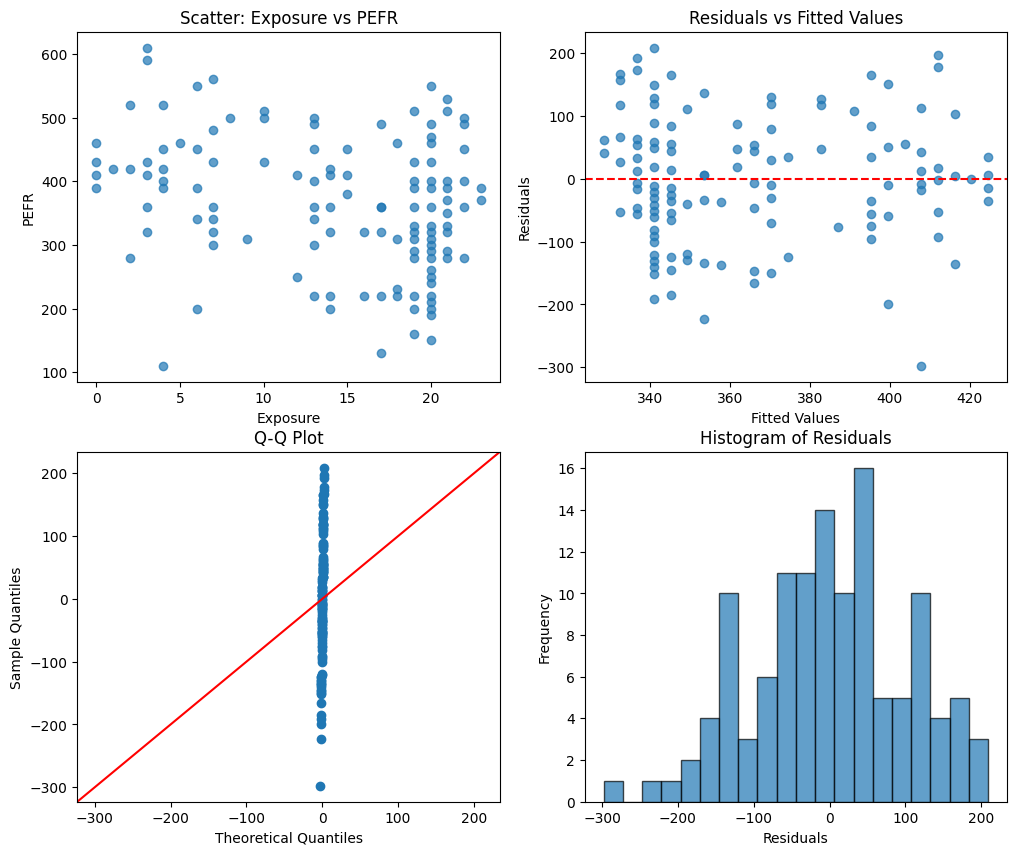

In [ ]:
# 2x2 subplot 생성
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# 1. 선형성: 산점도: Exposure vs PEFR
ax[0, 0].scatter(lung['Exposure'], lung['PEFR'], alpha=0.7)
ax[0, 0].set_title('Scatter: Exposure vs PEFR')
ax[0, 0].set_xlabel('Exposure')
ax[0, 0].set_ylabel('PEFR')

# 2. 잔차 vs 예측값 (등분산성)
ax[0, 1].scatter(fitted_values, residuals, alpha=0.7)
ax[0, 1].axhline(y=0, linestyle='--', color='red')
ax[0, 1].set_title('Residuals vs Fitted Values')
ax[0, 1].set_xlabel('Fitted Values')
ax[0, 1].set_ylabel('Residuals')
# -> 잔차가 y=0을 중심으로 고르게 퍼지는지 확인 (잔차의 분산)
# -> 특정 패턴이 보이면 등분산성을 위배한 것

# 3. Q-Q Plot (정규성 검토)
sm.qqplot(residuals, line='45', ax=ax[1, 0])
ax[1, 0].set_title('Q-Q Plot')
# -> 점들이 직선을 잘 따르면 잔차의 정규성 만족

# 4. 잔차의 히스토그램
ax[1, 1].hist(residuals, bins=20, alpha=0.7, edgecolor='black')
ax[1, 1].set_title('Histogram of Residuals')
ax[1, 1].set_xlabel('Residuals')
ax[1, 1].set_ylabel('Frequency')
# -> 잔차의 분포가 정규분포와 가까운지 시각적으로 확인

plt.show()

Exposure와 PEFR 간의 선형관계가 뚜렷하지 않다. (산점도에서 분포가 퍼져 있음)  
잔차는 등분산성을 만족하지 않으며, 정규성을 따르지 않는다.

따라서 이 데이터에 단순선형회귀를 적용하는 것은 적절하지 않다고 볼 수 있다.

<br>




In [ ]:
# 선형관계: 상관관계
print('1. 선형성: 상관관계')
display(lung[['PEFR', 'Exposure']].corr().round(2))

# 더빈왓슨 통계: 오차의 자기 상관
dw_stat = durbin_watson(residuals)
print(f'2. 더빈-왓슨 오차의 자기 상관: {dw_stat:.3f}')

# 잔차의 정규성 확인
shapiro_stat, shapiro_p_value = shapiro(residuals)
print(f"3. 정규성 샤피로-윌크 \n\t통계량: {shapiro_stat:.3f}, p-value: {shapiro_p_value:.3f}")

1. 선형성: 상관관계


,PEFR,Exposure
PEFR,1.00,-0.28
Exposure,-0.28,1.00


2. 더빈-왓슨 오차의 자기 상관: 1.111
3. 정규성 샤피로-윌크 
	통계량: 0.991, p-value: 0.586


PEFR과 Exposure 사이에는 약한 음의 선형관계가 있다.  
잔차는 정규성을 만족하지만, 오차의 독립성(자기상관 없음)은 만족하지 않는다.

따라서 단순선형회귀모형을 그대로 쓰기에는 한계가 있고, 추가 진단이 필요하다고 생각해 볼 수 있다.

<br>


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PEFR   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     9.974
Date:                Mon, 28 Apr 2025   Prob (F-statistic):            0.00201
Time:                        11:17:16   Log-Likelihood:                -735.68
No. Observations:                 122   AIC:                             1475.
Df Residuals:                     120   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.5828     20.796     20.417      0.000     383.408     465.757
Exposure      -4.1846      1.325     -3.158      0.002      -6.808      -1.561
==============================================================================
Omnibus:                        0.767   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.891
Skew:                          -0.162   Prob(JB):                        0.641
Kurtosis:                       2.734   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 모델 유의성 (p=0.002)
    - Exposure는 PEFR에 통계적으로 유의한 영향을 준다.  

- 설명력 (R² = 0.077) -> 낮음
    - PEFR을 설명하기엔 Exposure 하나로는 부족하다.

- 계수 -4.18
    - 노출이 많을수록 폐활량은 감소한다.

- 잔차 정규성	만족
    - 분석 신뢰도가 있다고 판단할 수 있다.

- 잔차 독립성	-> 다소 의심
    - DW = 1.111은 2보다 작아 자기상관 가능성 존재

<br>

다른 변수들 추가(나이, 성별, 흡연 여부 등)를 통해 다중선형회귀로 확장이 필요하다.


설명력이 매우 낮기 때문에, 예측보다는 관계 확인에 의미를 둬야 한다.



<br>

## 2. 다중선형회귀

### 2-1 마케팅 매출 예측
- date: 날짜 (주 단위)
- ad_spend: 광고비 (단위: 백만 원)
- discount_rate: 할인율 (단위: %)
- store_visits: 매장 방문 수 (단위: 천 명)
- season: 계절성 변수 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)
- sales: 매출 (단위: 백만 원)

광고비, 할인율, 매장 방문 수, 계절성을 기반으로 매출을 예측하는 다중선형회귀 분석을 구현한다.

데이터를 가상으로 생성하고 학습/테스트로 분리하여 모델을 학습한 후, 예측값과 실제값을 비교하고 성능을 평가한다. 회귀 계수를 통해 변수들의 영향력을 해석하고, 모델의 설명력(R²)과 예측 오차(MSE)를 수치와 시각적으로 확인한다.



,date,ad_spend,discount_rate,store_visits,season,sales
date,1.00,-0.13,0.06,0.10,-0.07,-0.11
ad_spend,-0.13,1.00,-0.16,0.01,0.04,0.96
discount_rate,0.06,-0.16,1.00,0.02,0.14,-0.27
store_visits,0.10,0.01,0.02,1.00,0.14,0.09
season,-0.07,0.04,0.14,0.14,1.00,0.04
sales,-0.11,0.96,-0.27,0.09,0.04,1.00


Mean Squared Error (MSE): 93.43
R-squared (R²): 0.92


,Feature,Coefficient
0,ad_spend,1.551682
1,discount_rate,-0.779079
2,store_visits,0.042387
3,season,0.860413


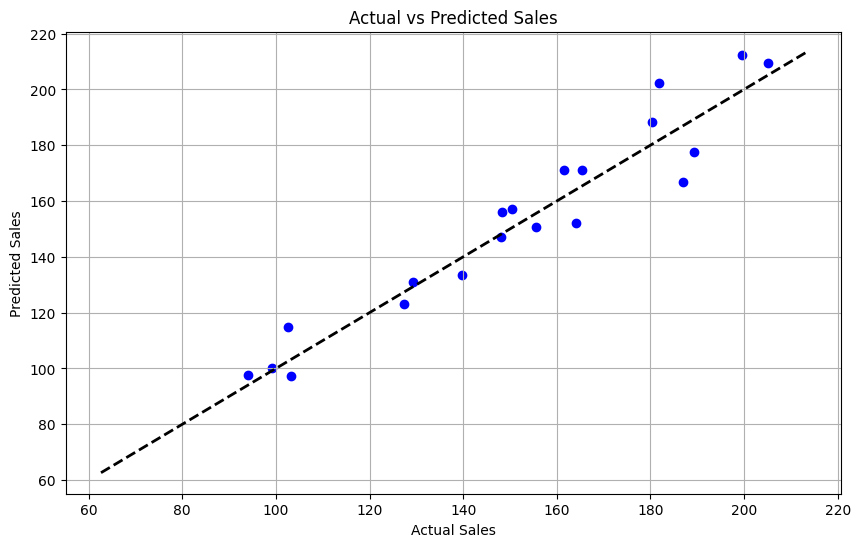

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# 랜덤 시드 고정: 재현성 확보
np.random.seed(42)

# 가상 데이터 생성
n = 100  # 데이터 개수
dates = pd.date_range(start="2023-01-01", periods=n, freq='W')

# 독립 변수 생성
ad_spend = np.random.randint(20, 100, size=n)    # 광고비 (단위: 백만 원)
discount_rate = np.random.uniform(5, 30, size=n)  # 할인율 (단위: %)
store_visits = np.random.randint(200, 500, size=n) # 매장 방문 수 (단위: 천 명)
season = np.random.choice([1, 2, 3, 4], size=n)    # 계절성 (봄, 여름, 가을, 겨울)

# 종속 변수 (매출) 생성 - 광고비, 할인율, 매장 방문 수, 계절성 요인 활용
# 일정한 가중치를 부여하고 noise 추가
sales = (
    50 + 1.5 * ad_spend
    - 0.8 * discount_rate
    + 0.05 * store_visits
    + np.random.normal(0, 10, size=n)  # 정규분포 노이즈로 현실 반영
)

# 데이터프레임 생성
df = pd.DataFrame({
    'date': dates,
    'ad_spend': ad_spend,
    'discount_rate': discount_rate,
    'store_visits': store_visits,
    'season': season,
    'sales': sales
})

# 변수 간 상관관계 확인
display(df.corr().round(2))

# 특성 및 타겟 변수 설정
X = df[['ad_spend', 'discount_rate', 'store_visits', 'season']]
y = df['sales']

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 다중선형회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트셋으로 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)  # 평균 제곱 오차
r2 = r2_score(y_test, y_pred)             # 결정계수 (설명력)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# 회귀 계수 확인
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

display(coefficients)

# 실제값 vs 예측값 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.grid(True)
plt.show()

- 해석
    - ad_spend: 광고비가 증가할수록 매출이 증가 (𝛽>0)
    - discount_rate: 할인율이 높아질수록 매출이 감소 (𝛽<0)
    - store_visits: 매장 방문 수가 많을수록 매출이 증가 (𝛽>0)
    - season: 계절에 따른 매출 변화도 분석 가능

모델 성능 평가

- R-squared (R²) = 0.92  
    → 전체 매출 변동의 92%를 설명할 수 있을 만큼 매우 높은 설명력을 가지는 모델이다. 회귀 모델이 예측 타깃(매출)에 대해 상당히 잘 맞는다.

- MSE (Mean Squared Error) = 93.43  
    → 평균적으로 실제 매출과 예측 매출 간 오차 제곱이 약 93.43이다. 오차가 크지 않으며, 예측이 비교적 정확하다고 볼 수 있다.

- Actual vs Predicted Sales 시각화
    → 점들이 대각선(이상적인 예측선)을 따라 일정하게 분포되어 있고 과도한 편향이 없어 보인다. 이는 모델이 대부분의 경우에 대해 잘 작동하고 있다는 시각적 증거이다.

<br>

2. 변수별 영향력 (회귀 계수 기준)

| 변수 | 계수 | 해석 |
| --- | --- | --- |
| `ad_spend` | **+1.55** | 광고비가 1단위(백만 원) 증가할 때, **매출이 약 1.55 단위 증가**함 → 가장 강력한 양의 영향력 |
| `discount_rate` | **–0.78** | 할인율이 1% 증가할 때 **매출이 약 0.78 단위 감소** → 할인율 상승이 매출에 부정적 영향을 줄 수 있음 |
| `store_visits` | **+0.042** | 매장 방문 수 증가가 매출에 **미미한 양의 영향**을 주지만 영향력은 작음 |
| `season` | **+0.86** | 계절성이 매출에 일정한 영향을 주는 것으로 해석 가능 (정확한 해석은 범주형 처리에 따라 달라짐) |

<br>

광고비가 매출에 가장 큰 영향을 미친다는 사실이 계수와 상관계수(r = 0.96)를 통해 모두 입증되었다. 마케팅 예산 배분 시 우선 고려 요소이다.

할인율이 오히려 매출에 부정적인 영향을 준다는 결과는 흥미롭다. 과도한 할인은 수익에 악영향을 줄 수 있으며, 충성 고객에게만 제한 제공하는 전략이 필요할 수 있다.

다store_visits, season과 같은 변수의 해석은 더 많은 맥락을 고려하거나 범주형 처리 개선이 필요하다.

<br>



### 가정 검정

가정이 충족된 회귀 모델을 만들기 위해, 다음 네 가지 회귀 가정을 점검한다.

- 선형성 (Linearity)

- 오차의 독립성 (Independence)

- 등분산성 (Homoscedasticity)

- 오차의 정규성 (Normality)

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     417.4
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           2.44e-59
Time:                        01:19:34   Log-Likelihood:                -363.30
No. Observations:                 100   AIC:                             736.6
Df Residuals:                      95   BIC:                             749.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            50.7221      5.472      9.269

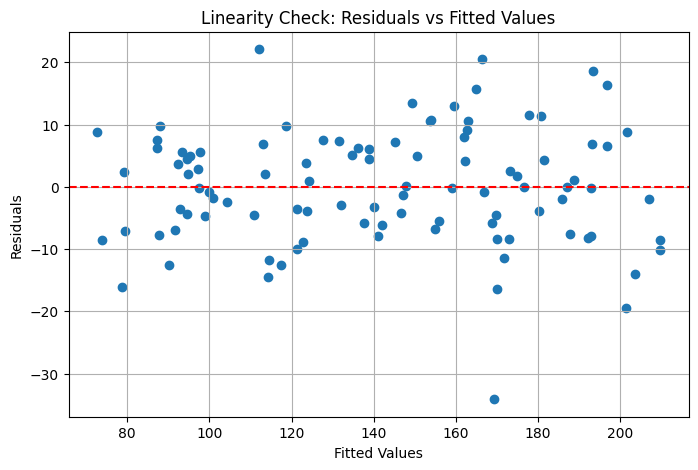

Durbin-Watson Statistic: 2.31 (2에 가까울수록 독립성 만족)


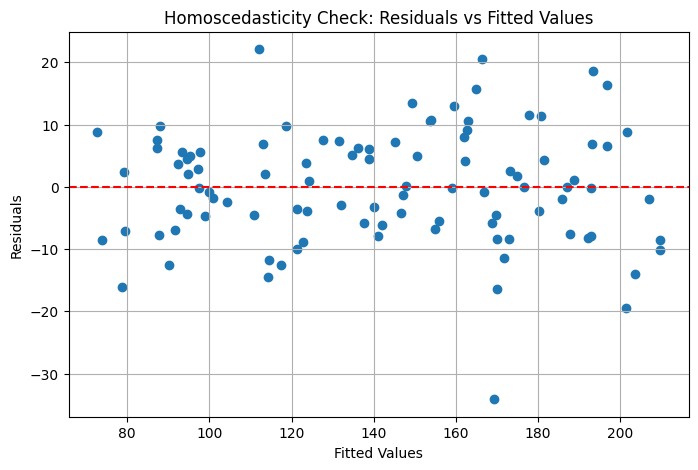

Breusch-Pagan Test p-value: 0.1484 (p < 0.05이면 등분산성 위반)


<Figure size 800x500 with 0 Axes>

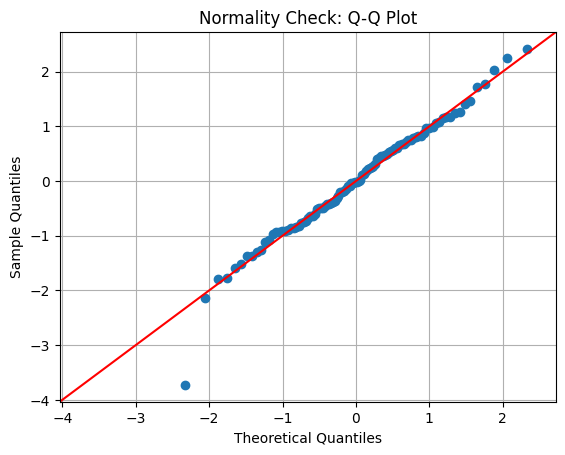

Shapiro-Wilk Test p-value: 0.2906 (p < 0.05이면 정규성 위반)
Jarque-Bera Test p-value: 0.0705 (p < 0.05이면 정규성 위반)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro, jarque_bera

# 데이터프레임 df는 앞서 생성된 가상 매출 예측 데이터 사용
np.random.seed(42)

# 특성 및 타겟 변수 설정
X = df[['ad_spend', 'discount_rate', 'store_visits', 'season']]
X = sm.add_constant(X)  # 상수항 추가
y = df['sales']

# 회귀 모델 학습 (statsmodels 사용)
model = sm.OLS(y, X).fit()
print(model.summary())

# 잔차 계산
residuals = model.resid
fitted_values = model.fittedvalues

# 1. 선형성(Linearity) 확인: 예측된 값과 잔차의 산점도
plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Linearity Check: Residuals vs Fitted Values')
plt.grid(True)
plt.show()

# 2. 독립성(Independence) 확인: 잔차의 자기상관 검정 (Durbin-Watson)
dw_stat = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_stat:.2f} (2에 가까울수록 독립성 만족)')

# 3. 등분산성(Homoscedasticity) 확인: 잔차의 분산이 일정한지 검토
plt.figure(figsize=(8, 5))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Residuals vs Fitted Values')
plt.grid(True)
plt.show()

# 등분산성 검정: Breusch-Pagan Test
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, X)
print(f'Breusch-Pagan Test p-value: {bp_test[1]:.4f} (p < 0.05이면 등분산성 위반)')

# 4. 정규성(Normality) 확인: 잔차의 Q-Q 플롯
plt.figure(figsize=(8, 5))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normality Check: Q-Q Plot')
plt.grid(True)
plt.show()

# 정규성 검정: Shapiro-Wilk Test 및 Jarque-Bera Test
shapiro_test = shapiro(residuals)
jarque_bera_test = jarque_bera(residuals)
print(f'Shapiro-Wilk Test p-value: {shapiro_test.pvalue:.4f} (p < 0.05이면 정규성 위반)')
print(f'Jarque-Bera Test p-value: {jarque_bera_test.pvalue:.4f} (p < 0.05이면 정규성 위반)')

모델 설명력  
- R-squared = 0.946, Adj. R-squared = 0.944
    → 전체 매출(sales)의 약 **94.6%**가 네 개의 변수(ad_spend, discount_rate, store_visits, season)로 설명됨
    → 설명력이 매우 높은 모델로 볼 수 있다.

<br>

회귀 계수 및 유의성 (P>|t|)

| 변수 | 계수 (coef) | p-value | 해석 |
| --- | --- | --- | --- |
| ad_spend | +1.5366 | 0.000 | 광고비가 1 단위 증가하면, 매출이 평균 1.54만큼 증가 (매우 유의) |
| discount_rate | -0.7151 | 0.000 | 할인율이 1% 증가하면 매출은 평균 0.72 감소 (매우 유의) |
| store_visits | +0.0386 | 0.001 | 매장 방문 수가 증가하면 매출이 증가 (유의) |
| season | +0.1102 | 0.900 | 계절은 통계적으로 유의하지 않음 (p > 0.05) |

ad_spend, discount_rate, store_visits는 유의미한 예측 변수이며,  
season은 유의하지 않으므로 제거하는 것도 고려 가능하다.

<br>

잔차 분석을 통한 회귀 가정 검토

- 선형성 (Linearity)  
    잔차 vs 예측값 산점도에서 전반적으로 랜덤한 분포.
    → 선형성 가정 만족

- 독립성 (Independence)  
    Durbin-Watson = 2.311  
    → 잔차 간 상관관계 없음 → 독립성 만족

- 등분산성 (Homoscedasticity)   
    Breusch-Pagan p-value = 0.1484 (> 0.05)  
    → 등분산성 가정 만족

- 정규성 (Normality)  
    Shapiro-Wilk p = 0.2906, Jarque-Bera p = 0.0705  
    → 모두 p > 0.05 → 정규성 가정 충분히 만족

<br>

광고비가 매출에 가장 강력한 영향을 미치는 요인임을 확인할 수 있다. 매출을 높이기 위해 광고비 전략 조정이 중요하다.

할인율이 너무 높으면 오히려 매출에 부정적 영향을 줄 수 있으며, 과도한 할인은 수익성에 악영향을 줄 가능성이 있다.

계절성은 통계적으로 유의하지 않으며, 제거해도 모델 성능에 큰 영향이 없을 수 있다.

모든 회귀 가정(선형성, 독립성, 등분산성, 정규성)을 만족하므로, 이 모델은 통계적으로 안정적이고 신뢰할 수 있는 회귀 모델이다.



<br>


독립 변수 간의 다중공선성(multicollinearity)을 진단하기 위해 **VIF (분산팽창요인)**을 계산해 보자.



In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
vif = pd.DataFrame()
vif["features"] = X.columns
# 각 변수마다 VIF를 계산해 리스트로 저장
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif = vif.sort_values(by = 'VIF Factor', ascending = False)

display(vif.round(2))

,features,VIF Factor
2,store_visits,10.42
3,season,6.39
1,discount_rate,6.23
0,ad_spend,5.49


VIF > 10: 심각한 다중공선성 의심

VIF > 5: 다중공선성 주의 필요

VIF < 5: 문제 없음

→ 위 결과에서는 모든 변수에서 다중공선성 주의 필요  
→ 특히 store_visits는 10.42로 다중공선성 문제 가능성 높음


<br>

- 회귀분석 4가지 기본 가정
    - 선형성 확인:
        예측 값과 잔차 간의 산점도에서 패턴이 없고, 잔차들이 무작위로 분포하면 선형성 가정이 만족됨.
    - 독립성 확인 (Durbin-Watson 검정):
    Durbin-Watson 통계량이 2에 가까울수록 잔차의 독립성이 만족됨.
    값이 0에 가까우면 양의 자기상관, 4에 가까우면 음의 자기상관이 있음.

    - 등분산성 확인 (Breusch-Pagan 검정):
    예측 값과 잔차의 산점도에서 잔차의 분산이 일정하면 등분산성이 만족됨.
    Breusch-Pagan 테스트의 p-value가 0.05 이상이면 등분산성을 만족한다고 볼 수 있음.

    - 정규성 확인 (Q-Q Plot 및 정규성 테스트):
    Q-Q 플롯에서 잔차들이 대각선에 가까울수록 정규성 가정이 만족됨.
    Shapiro-Wilk 및 Jarque-Bera 테스트의 p-value가 0.05 이상이면 정규성을 만족한다고 볼 수 있음.

- 분석 결과 해석
    - Durbin-Watson 값: 2에 가까울수록 독립성 가정이 만족됨.
    - Breusch-Pagan Test p-value: 0.05 이상이면 등분산성 가정이 만족됨.
    - Shapiro-Wilk Test p-value: 0.05 이상이면 정규성 가정이 만족됨.

### Q2) 2-2. 킹 카운티 주택 정보
- 1) skelearn을 통해서 훈련시켜서 각 X변수에 대해서 회귀계수 뽑아보기
- 2) statsmodel을 통해 적합하고 결과 뽑아보기

킹 카운티(King County)의 주택 데이터셋을 기반으로 회귀 분석을 수행하고, 결과 해석 및 다중공선성 확인, 예측값 평가의 과정을 수행한다.

In [5]:
import pandas as pd

# GitHub의 파일 경로
url = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/house_sales.csv"
# CSV 파일 불러오기
house = pd.read_csv(url, sep = '\t')
# 데이터 확인
house.head(3)

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22687 entries, 1 to 27063
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DocumentDate     22687 non-null  object 
 1   SalePrice        22687 non-null  int64  
 2   PropertyID       22687 non-null  int64  
 3   PropertyType     22687 non-null  object 
 4   ym               22687 non-null  object 
 5   zhvi_px          22687 non-null  int64  
 6   zhvi_idx         22687 non-null  float64
 7   AdjSalePrice     22687 non-null  float64
 8   NbrLivingUnits   22687 non-null  int64  
 9   SqFtLot          22687 non-null  int64  
 10  SqFtTotLiving    22687 non-null  int64  
 11  SqFtFinBasement  22687 non-null  int64  
 12  Bathrooms        22687 non-null  float64
 13  Bedrooms         22687 non-null  int64  
 14  BldgGrade        22687 non-null  int64  
 15  YrBuilt          22687 non-null  int64  
 16  YrRenovated      22687 non-null  int64  
 17  TrafficNoise     

In [7]:
# 종속변수: AdjSalePrice(조정된 판매가)
subset = ['AdjSalePrice', 'SqFtTotLiving','SqFtLot','Bathrooms','Bedrooms','BldgGrade']
house[subset].head(3)

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8


In [8]:
# OLS 회귀분석 수행
import statsmodels.api as sm
X = house[['SqFtLot','Bedrooms']]
#,'BldgGrade','Bathrooms''SqFtTotLiving'
# X = sm.add_constant(X)
y = house['AdjSalePrice']

In [9]:
model = sm.OLS(y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           AdjSalePrice   R-squared (uncentered):                   0.716
Model:                            OLS   Adj. R-squared (uncentered):              0.716
Method:                 Least Squares   F-statistic:                          2.860e+04
Date:                Tue, 29 Apr 2025   Prob (F-statistic):                        0.00
Time:                        13:43:46   Log-Likelihood:                     -3.2273e+05
No. Observations:               22687   AIC:                                  6.455e+05
Df Residuals:                   22685   BIC:                                  6.455e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared = 0.716 → 이 모델은 약 72%의 변동성을 설명한다.

- P>|t| = 0.000 → 두 변수 모두 통계적으로 유의미함

- Bedrooms 계수 = 16만 → 침실 1개 증가 시 평균 16만 달러 상승

주의: 상수항이 없음으로 R²는 중심화되지 않은 상태이다. (uncentered)

<br>


In [14]:
# 다중공선성 확인 (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_vif = X
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
# display(vif)
vif['Feature'] = df_vif.columns
vif = vif.sort_values(by = 'VIF Factor', ascending = False)
display(vif.round(2))

,VIF Factor,Feature
1,1.17,Bedrooms
0,1.17,SqFtLot


- VIF: 독립 변수 간의 상관관계를 확인하여 다중공선성 여부 판단

- SqFtLot, Bedrooms 모두 VIF = 1.17 → 다중공선성 없음

<br>


In [11]:
res = pd.merge(house[subset], pd.DataFrame(model.fittedvalues), left_index = True, right_index = True)
res.head(3)

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade,0
1,300805.0,2400,9373,3.00,6,7,975509.060207
2,1076162.0,3764,20156,3.75,4,10,672321.717173
3,761805.0,2060,26036,1.75,4,8,681615.819634


In [12]:
res.columns

Index([ 'AdjSalePrice', 'SqFtTotLiving',       'SqFtLot',     'Bathrooms',
            'Bedrooms',     'BldgGrade',               0],
      dtype='object')

In [15]:
# 모델 평가 (MSE)

from sklearn.metrics import mean_squared_error

mean_squared_error(res['AdjSalePrice'], res[0])

132893509355.78697

- 예측값과 실제값 사이의 평균제곱오차(MSE) 계산

- 결과: 132893509355.78  
    → 오차 크기 자체는 데이터 단위(달러)에 따라 클 수 있으나 상대적 비교용으로 사용

<br>


### Best case use(sklearn예시)

AdjSalePrice (보정된 판매가)를 여러 주택 특성(SqFtTotLiving, Bathrooms, BldgGrade 등)을 통해 예측하고, 어떤 변수들이 중요한지 판단하며 모델의 성능을 향상시킨다.


- statsmodels와 sklearn 두 방법으로 회귀 분석 수행

- 기본 모델 → 다중 변수 모델 → 더 많은 변수 포함한 확장 모델로 점차 고도화

- 성능 평가지표: R², RMSE, p-value, VIF 등



In [16]:
# 회귀 예측 변수 선택 (subset)
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms',
          'Bedrooms', 'BldgGrade']
house[subset].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [17]:
# sklearn을 이용한 모델 학습 및 계수 추출
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms',
              'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240793
 SqFtLot: -0.06046682065307607
 Bathrooms: -19442.840398321066
 Bedrooms: -47769.95518521438
 BldgGrade: 106106.96307898081


- SqFtTotLiving, BldgGrade는 양의 영향
- Bedrooms, Bathrooms는 음의 영향

In [18]:
# 예측값, RMSE, R² 계산
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


In [19]:
# statsmodels를 통한 해석용 회귀분석
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     1413.
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:50:50   Log-Likelihood:            -3.2266e+05
No. Observations:               22687   AIC:                         6.453e+05
Df Residuals:                   22684   BIC:                         6.453e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.108e+05   9310.630     11.895      0.0

In [20]:
# 다중 변수 모델로 확장한 결과
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:51:01   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694

In [21]:
# 모델 선택

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms',
              'BldgGrade', 'PropertyType', 'NbrLivingUnits',
              'SqFtFinBasement', 'YrBuilt', 'YrRenovated',
              'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first=True, dtype=int)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:51:17   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving       

- SqFtTotLiving, BldgGrade는 꾸준히 유의미한 양의 영향 → 예측에 핵심

- Bedrooms, Bathrooms는 때로 음의 영향 → 다른 변수와의 중복 설명 가능성 (다중공선성)

- R² 값
    - 단순모델: 0.111
    - 다중모델(5개 변수): 0.541
    - 전체모델: 0.595 → 추가 변수들이 일부 설명력 기여

NewConstruction, YrRenovated 등은 p-value 기준 제거하는 것도 고려할 수 있다.

<br>


## 3. 로지스틱회귀

### 3-1 암진단 예측

load_breast_cancer 데이터로 이진 분류 로지스틱 회귀모델을 학습하고, 다중공선성이 높은 변수를 제거하여 모델을 개선한다.

- VIF(Variance Inflation Factor)를 반복 계산하여 VIF > 10인 변수를 제거 → 변수 간 상관 문제 해결

In [22]:
from sklearn.datasets import load_breast_cancer
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 데이터 로드 및 DataFrame 생성
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 독립 변수와 종속 변수 설정
X = df.drop(columns=['target'])  # 독립 변수
y = df['target']  # 종속 변수 (0: 악성, 1: 양성)

# 상수 추가 (intercept)
X = sm.add_constant(X)

# VIF(Variance Inflation Factor) 계산 함수
def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# VIF를 사용하여 다중공선성이 높은 변수 확인 및 제거
while True:
    vif = calculate_vif(X)
    max_vif = vif['VIF'].max()
    if max_vif > 10:  # VIF가 10을 초과하는 경우 해당 변수 제거
        col_to_remove = vif.loc[vif['VIF'].idxmax(), 'Variable']
        print(f"Removing '{col_to_remove}' due to high VIF: {max_vif}")
        X = X.drop(columns=[col_to_remove])
    else:
        break

# 로지스틱 회귀 모델 학습
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Removing 'mean radius' due to high VIF: 3806.1152963979675
Removing 'const' due to high VIF: 1817.2517455011255
Removing 'worst radius' due to high VIF: 7573.943486033555
Removing 'mean perimeter' due to high VIF: 3901.901687119607
Removing 'worst perimeter' due to high VIF: 668.3854404127386
Removing 'mean fractal dimension' due to high VIF: 508.08682464149285
Removing 'worst smoothness' due to high VIF: 368.0533791867144
Removing 'worst texture' due to high VIF: 309.54444960438434
Removing 'worst fractal dimension' due to high VIF: 184.67972071700538
Removing 'worst symmetry' due to high VIF: 167.30971478504884
Removing 'mean concavity' due to high VIF: 142.29904340088856
Removing 'radius error' due to high VIF: 104.99215955661566
Removing 'worst concave points' due to high VIF: 100.94649021325061
Removing 'mean smoothness' due to high VIF: 86.99658368431041
Removing 'mean compactness' due to high VIF: 74.72314541276282
Removing 'mean area' due to high VIF: 67.47169344522399
Removing

회귀 결과 해석

| 변수 | 계수 (coef) | p-value | 해석 요약 |
| --- | --- | --- | --- |
| texture error | 1.1245 | 0.006 | 유의미. texture error가 클수록 양성일 확률 증가 |
| area error | -0.1102 | 0.000 | 유의미. area error가 클수록 악성일 가능성 증가 |
| smoothness error | 301.25 | 0.001 | 유의미. 양성일수록 매끄럽지 않음 |
| concavity error | 9.82 | 0.310 | 유의미하지 않음 |
| symmetry error | 103.06 | 0.000 | 유의미. 비대칭성이 클수록 양성일 확률 증가 |
| fractal dimension error | 225.75 | 0.073 | 기준점에서 약간 벗어남 |
| worst concavity | -8.70 | 0.000 | 유의미. 악성일수록 concavity가 큼 |

<br>

전체 모델 적합도

- Pseudo R-squared: 0.614  
    → 로지스틱 회귀에서는 높은 편, 설명력 양호
    
- LLR p-value: 유의수준보다 매우 작음 (1.83e-96)  
    → 모델 전체가 통계적으로 유의미
    

<br>

다중공선성 제거 후 모델 안정성 확보  
- VIF > 10인 변수들을 제거하여 회귀 계수 왜곡 방지

의미 있는 예측 변수 도출  
- `symmetry error`, `texture error`, `smoothness error`, `area error`, `worst concavity` 등은 유의한 변수로 판단됨

모델 성능 우수  
- Pseudo R²가 0.614로, 타겟(y)을 적절히 설명하고 있음

<br>


## 4. 생존분석

In [23]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 6.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=8cb5ff86c270becb9fd04aa8051e9102eda602019dfc63a68be04a4a1eb98d9d
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


### 4.1 카플란 마이어

관찰된 생존 시간 데이터를 기반으로 생존 확률(Survival Probability) 을 시각적으로 표현한다.

사건 발생 여부(예: 사망 여부)와 시간을 바탕으로 누적 생존률 곡선을 그린다.

,duration,event
0,5,1
1,6,1
2,6,0
3,7,1
4,8,1
5,8,0
6,10,1
7,12,1
8,14,1
9,15,0


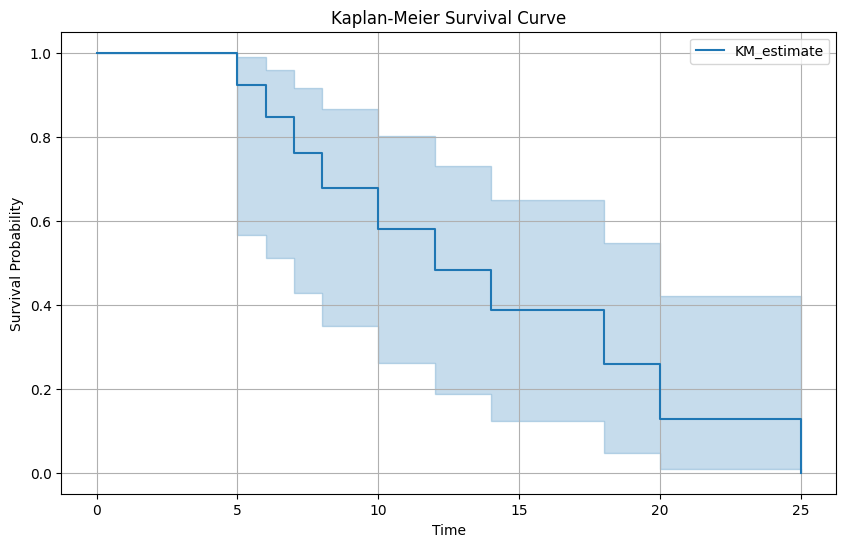

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# 예시 데이터 생성
data = {
    'duration': [5, 6, 6, 7, 8, 8, 10, 12, 14, 15, 18, 20, 25],
    'event': [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
}

df = pd.DataFrame(data)
display(df)
# Kaplan-Meier Fitter 생성
kmf = KaplanMeierFitter()

# 생존 함수 적합
# event = 1이면 사건 발생, 0이면 right-censoring(중도 절단)
kmf.fit(durations=df['duration'], event_observed=df['event'])

# 생존 곡선 시각화
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

그래프는 시간이 지날수록 생존 확률이 어떻게 감소하는지를 보여준다.

- 계단식 형태로 줄어들며, event=1일 때 생존률이 하락힌디.

- 초기 생존률은 100%에서 시작하고, 생존률이 일정 시간 이후 급격히 떨어지는 구간은 중요 위험 구간으로 해석할 수 있다.

<br>





### 4.2 Log-Rank Test

두 개 이상의 그룹이 생존률에 유의미한 차이가 있는지 통계적으로 검정한다.

In [25]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# 데이터 생성
data = {
    'group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
    'duration': [6, 7, 10, 15, 23, 5, 8, 12, 18, 22],
    'event': [1, 0, 1, 0, 1, 1, 1, 0, 1, 1]
}

df = pd.DataFrame(data)
display(df)
# 두 그룹 나누기
groupA = df[df['group'] == 'A']
groupB = df[df['group'] == 'B']

# Kaplan-Meier Fitter 생성
kmf_A = KaplanMeierFitter()
kmf_B = KaplanMeierFitter()

# 생존 함수 적합
kmf_A.fit(durations=groupA['duration'], event_observed=groupA['event'], label='Group A')
kmf_B.fit(durations=groupB['duration'], event_observed=groupB['event'], label='Group B')

# Log-Rank 테스트 수행
# duration, event 두 그룹에 대해 각각 넣고 검정 수행
results = logrank_test(groupA['duration'], groupB['duration'], event_observed_A=groupA['event'], event_observed_B=groupB['event'])
results.print_summary()

,group,duration,event
0,A,6,1
1,A,7,0
2,A,10,1
3,A,15,0
4,A,23,1
5,B,5,1
6,B,8,1
7,B,12,0
8,B,18,1
9,B,22,1


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.46 0.50      1.00

- p-value ≈ 0.50 → 유의미한 생존률 차이가 없음
- test_statistic 값은 log-rank 검정 통계량(카이제곱 기반)


,group,duration,event
0,A,6,1
1,A,7,0
2,A,10,1
3,A,15,0
4,A,23,1
5,B,5,1
6,B,8,1
7,B,12,0
8,B,18,1
9,B,22,1


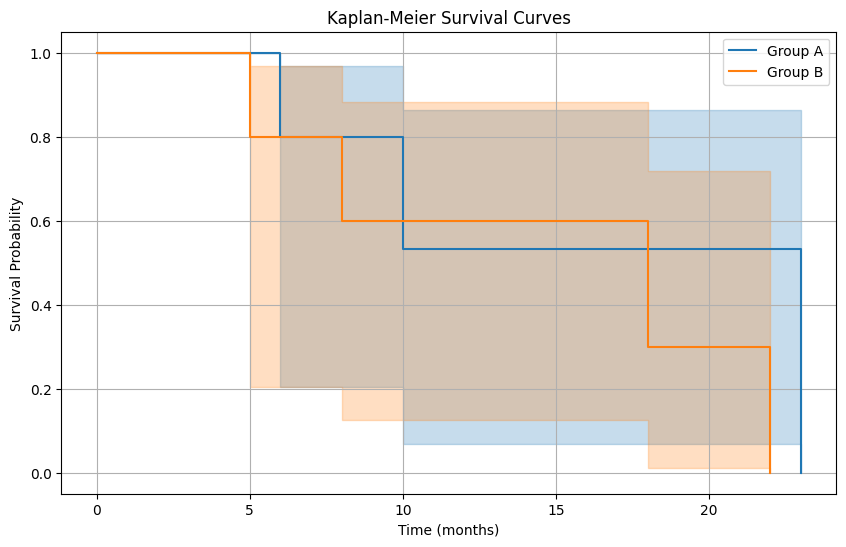

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# 데이터 생성
data = {
    'group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
    'duration': [6, 7, 10, 15, 23, 5, 8, 12, 18, 22],
    'event': [1, 0, 1, 0, 1, 1, 1, 0, 1, 1]
}

df = pd.DataFrame(data)
display(df)
# 두 그룹 나누기
groupA = df[df['group'] == 'A']
groupB = df[df['group'] == 'B']

# Kaplan-Meier Fitter 생성
kmf_A = KaplanMeierFitter()
kmf_B = KaplanMeierFitter()

# 생존 함수 적합
kmf_A.fit(durations=groupA['duration'], event_observed=groupA['event'], label='Group A')
kmf_B.fit(durations=groupB['duration'], event_observed=groupB['event'], label='Group B')

# 생존 곡선 시각화
plt.figure(figsize=(10, 6))
kmf_A.plot_survival_function()
kmf_B.plot_survival_function()
plt.title('Kaplan-Meier Survival Curves')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

그룹 A와 B의 생존곡선은 비슷하게 움직이며, 통계적으로 차이가 없다.

실제 치료 효과/집단 효과 없음으로 해석할 수 있다.

<br>


### 4.3. Cox Regression

Cox 비례 위험 회귀 (Cox Proportional Hazards Model)는 여러 변수(age, treatment 등)가 사건 발생 위험(hazard) 에 어떤 영향을 주는지 분석한다.

시간과 함께 hazard에 대한 상대적 영향력을 추정한다.



<lifelines.CoxPHFitter: fitted with 20 total observations, 6 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 20
number of events observed = 14
   partial log-likelihood = -18.82
         time fit was run = 2025-04-29 14:03:26 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
age       -0.11      0.89      0.03           -0.18           -0.05                0.84                0.95
treatment -1.41      0.24      0.69           -2.76           -0.06                0.06                0.94

           cmp to     z      p  -log2(p)
covariate                               
age          0.00 -3.41 <0.005     10.56
treatment    0.00 -2.05   0.04      4.63
---
Concordance = 0.89
Partial AIC = 41.63
log-likelihood ratio test = 19.63 on 2 df
-log2(p) of ll-ratio test = 14.16

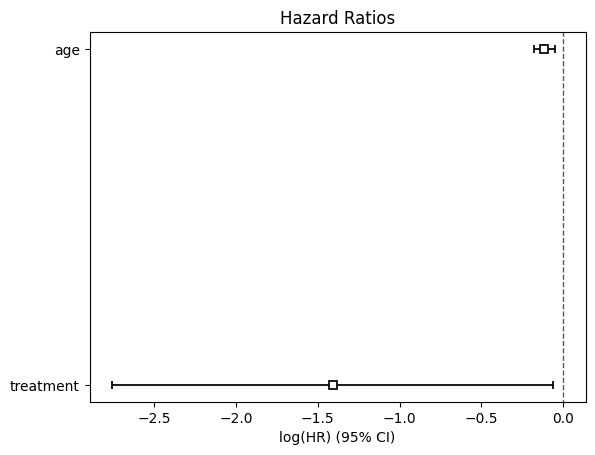

In [27]:
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# 예시 데이터 생성
'''
duration: 환자가 생존한 기간(개월 수)
event: 사건 발생 여부(1 = 사망, 0 = 생존)
age: 환자의 나이
treatment: 치료 방법(0 = 치료 A, 1 = 치료 B)
'''
data = {
    'duration': [5, 6, 6, 7, 8, 8, 10, 12, 14, 15, 18, 20, 25, 5, 7, 12, 13, 14, 16, 20],
    'event': [1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
    'age': [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 55, 60, 65, 70, 75, 80, 85],
    'treatment': [0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]
}

df = pd.DataFrame(data)

# 콕스 비례 위험 모형 적합
cph = CoxPHFitter()
cph.fit(df, duration_col='duration', event_col='event')

# 모형 요약 출력
cph.print_summary()

# 생존 곡선 시각화
cph.plot()
plt.title('Hazard Ratios')
plt.show()

- coef < 0: 위험 감소 (예: treatment = -1.41 → B 치료가 A보다 생존에 긍정적)

- exp(coef): hazard ratio (e.g., 0.24이면 위험이 76% 감소)

- p < 0.05: 통계적으로 유의미한 변수 (여기선 age, treatment 모두 해당)

나이가 많을수록 사망 위험이 증가한다. (age 계수 음수)

치료 B(treatment=1)는 사망 위험을 크게 낮춤 → 치료 효과가 유의미하다.

해석이 가능한 모델이면서도 해석력이 강한 변수를 식별 가능하다.

<br>



### 4.4. 마케팅 생존분석

고객이 마케팅 메시지를 받은 뒤 얼마나 빨리 구매로 전환되는가를 설명하는 생존 모델을 구성하고, 그에 영향을 주는 요인을 분석한다.

In [28]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter

# 가상의 데이터셋 생성
np.random.seed(413)


n_customers = 1000  # 1000명의 가상 고객 생성
customer_ids = range(1, n_customers + 1)
before_7_buy_yn = np.random.randint(2, size=n_customers)
sent_mkt_msg = np.random.randint(1, 6, size=n_customers)
discount_rate = np.random.choice([0, 5, 10, 15, 20], size=n_customers)
period_days = np.random.randint(1, 21, size=n_customers)  # period_days: 구매까지 걸린 일수 → 생존 시간으로 사용됨
is_buy = np.random.randint(2, size=n_customers)  # 구매 여부를 생존분석의 event로 사용 (1=구매 발생, 0=구매 안 함)

data = {
    'before_7_buy_yn': before_7_buy_yn,
    'sent_mkt_msg': sent_mkt_msg,
    'discount_rate': discount_rate,
    'period_days': period_days,
    'is_buy': is_buy
}
df = pd.DataFrame(data)
display(df)

,before_7_buy_yn,sent_mkt_msg,discount_rate,period_days,is_buy
0,1,3,15,6,1
1,0,3,20,19,0
2,0,2,5,16,0
3,0,1,5,8,1
4,0,2,0,17,0
...,...,...,...,...,...
995,0,1,0,14,1
996,0,5,15,16,0
997,0,4,10,19,1
998,1,5,20,2,0


In [29]:
# 조건 추가
df['sent_mkt_msg'] = np.where((df['sent_mkt_msg'] < 3) & (df['discount_rate'] > 10), np.random.randint(4, 6, size=n_customers), df['sent_mkt_msg'])
df['discount_rate'] = np.where((df['sent_mkt_msg'] >= 3) & (df['discount_rate'] <= 10), np.random.choice([15, 20], size=n_customers), df['discount_rate'])

# 모델 Fitting
# period_days를 시간으로, is_buy를 이벤트로 지정하여 적합.
cph = CoxPHFitter()
cph.fit(df, duration_col='period_days', event_col='is_buy')

# 회귀 계수 출력
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 514 right-censored observations>
             duration col = 'period_days'
                event col = 'is_buy'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 486
   partial log-likelihood = -2900.85
         time fit was run = 2025-04-29 14:03:38 UTC

---
                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                        
before_7_buy_yn  0.22      1.24      0.09            0.04            0.39                1.04                1.48
sent_mkt_msg     0.16      1.17      0.05            0.06            0.26                1.06                1.29
discount_rate   -0.03      0.97      0.01           -0.05           -0.01                0.95                0.99

                 cmp to     z      p  -log2(p)
covariate                                     
before_7_buy_yn    0.00  2.35   0.02      5.75
sent_mkt_msg       0.00  3.12 <0.005      9.11
discount_rate      0.00 -3.02 <0.005      8.62
---
Concordance = 0.55
Partial AIC = 5807.70
log-likelihood ratio test = 15.18 on 3 df
-log2(p) of ll-ratio test = 9.23

before_7_buy_yn
- 0.22 (p=0.02)
- 이전에 구매한 이력이 있는 경우 구매까지의 시간이 짧아짐 (위험 비 증가 → 전환 가능성 ↑)

sent_mkt_msg
- 0.16 (p<0.005)
- 마케팅 메시지를 많이 받을수록 구매 전환까지의 시간이 짧아짐

discount_rate
- -0.03 (p<0.005)
- 할인율이 높을수록 오히려 전환 확률이 낮아짐 → 할인 피로감 또는 무관심 가능성

<br>


[ 생존 분석 결과 및 인사이트 ]


>Kaplan-Meier는 생존 곡선을 시각화하고, Log-Rank Test는 그룹 간 차이를 확인하며, Cox Regression은 여러 요인의 영향을 동시에 고려한 정량적 해석이 가능하다.
>
>마케팅 생존 분석에서는 고객의 과거 구매 여부와 마케팅 메시지 횟수가 구매까지의 시간 단축에 긍정적 영향을 미쳤고, 예상과 달리 할인율은 부정적인 효과를 보였다.
>
>실제 마케팅 전략에서 할인보다는 타겟 메시지 전략이 더 효과적일 수 있음을 시사한다.

